In [248]:
import pandas as pd
import lifelines as lf
import matplotlib.pyplot as plt
%matplotlib inline

In [214]:
# Fig. 2A or E4. L+R+T(2)
def extract_data(sheet):
    df=pd.read_excel("si.xlsx",sheet_name=sheet)
    df.columns=["Days"]+list(df.columns)[:-1]
    df=df.loc[1:,[i for i in df.columns if i=="Days" or "Unnamed" not in i]]
    df=df.set_index("Days").apply(lambda x: x/x.iloc[0])
    cols = [i for i in df.columns if "dilp" not in i]
    df=df[cols]
    # Parse columns
    df.columns=[i.replace("wDah - ","") for i in df.columns]
    df.plot()
    return df
    

In [265]:
def get_lifes(df):
    max_life = {}
    median_life = {}
    control = "Control" if "Control" in df else "wDah - Control"
    for col in df.columns:
        base = df[col]

        first_zero_pos = base.index.get_loc(base.loc[base == 0].head(1).index[0])
        a = base.iloc[first_zero_pos - 1 : first_zero_pos + 1].index.values.mean()
        max_life[col] = a
        b = base.reset_index().copy()
        b = (
            b.append({"Days": pd.np.nan, col: 0.5}, ignore_index=True)
            .sort_values(col, ascending=False)
            .set_index(col)
        )
        median_life[col] = b.interpolate("linear").at[0.5, "Days"]
    return pd.concat([
        pd.Series(max_life,name='value')
        .pipe(lambda x: x / x[control])
        .drop(control)
        .to_frame()
        .assign(lifespan="max",),
        pd.Series(median_life,name='value')
        .pipe(lambda x: x / x[control])
        .drop(control)
        .to_frame()
        .assign(lifespan="median")]
    )

           Control Lithium
Days                      
0.25             1       1
3.22             1       1
5.19             1   0.995
6.92             1   0.995
8.92             1   0.995
11.96            1   0.995
16.13      0.95122   0.995
19.91      0.95122   0.995
24.15      0.95122   0.995
27.10     0.946341   0.995
32.19     0.936585    0.99
49.37     0.921951    0.99
52.13     0.863415    0.99
57.33     0.765854   0.965
62.04     0.663415    0.89
68.38     0.521951   0.735
71.33     0.380488   0.675
74.38     0.253659    0.56
80.17    0.0829268    0.42
83.00    0.0439024   0.255
85.00    0.0195122   0.135
87.00   0.00487805   0.085
90.00            0   0.025
92.00            0    0.01
94.00            0       0
96.00            0       0
99.00            0       0
101.00           0       0
104.00           0       0
106.00           0       0
108.00           0       0


ZeroDivisionError: division by zero

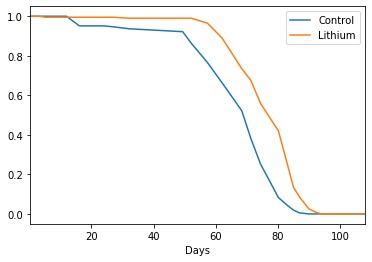

In [266]:
trials = [
    "Fig. 1D",
    "Fig. 1E",
    "Fig. 1F",
    "Fig. 2A",
    "E1. L+R",
    "E2. L+T",
    "E3. R+T",
    "E4. L+R+T(2)",
]
dfs=[]
for trial in trials:
    dfs.append(get_lifes(extract_data(trial)))

In [240]:
import seaborn as sns

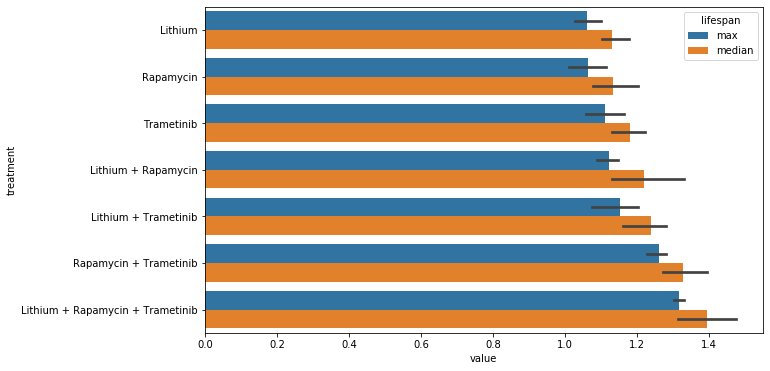

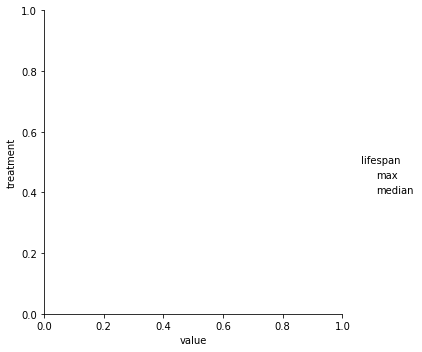

In [258]:
data = pd.concat(dfs).reset_index().rename(columns={"index": "treatment"})
plt.figure(figsize=(10, 6))
sns.catplot(
    x="value", y="treatment", data=data, hue="lifespan", kind="bar", ax=plt.gca()
)

In [264]:
data.groupby(['treatment','lifespan']).value.max().unstack()

lifespan,max,median
treatment,,
Lithium,1.123870,1.216071
Lithium + Rapamycin,1.147840,1.329876
Lithium + Rapamycin + Trametinib,1.329802,1.475760
Lithium + Trametinib,1.204092,1.280866
Rapamycin,1.169691,1.262455
Rapamycin + Trametinib,1.281428,1.395281
Trametinib,1.197581,1.249229
